In [1]:
from qiskit import QuantumCircuit, QuantumRegister

In [2]:
import os, sys

sys.path.append(os.path.abspath("../"))


In [3]:
from helperfunctions.reversecircuitgraph import reverse_all_operations
from helperfunctions.circuitgraphfunctions import get_computation_graph, get_uncomp_circuit

In [4]:
num_i = 2
num_a = 2
num_o = 2

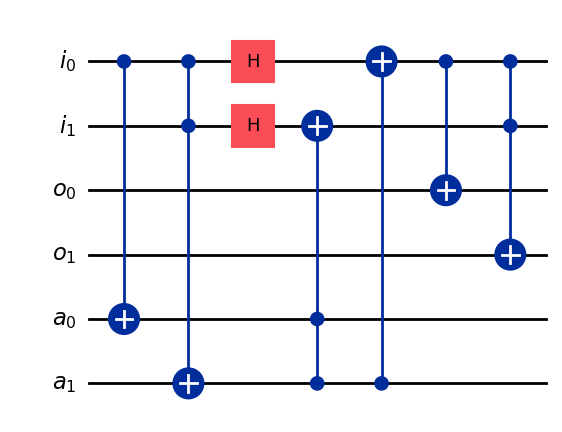

In [5]:
i = QuantumRegister(num_i, 'i')
o = QuantumRegister(num_o, 'o')
a = QuantumRegister(num_a, 'a')

circ = QuantumCircuit(i,o,a)

circ.cx(i[0],a[0])
circ.ccx(i[0],i[1],a[1])

circ.h(i[0])
circ.h(i[1])

circ.ccx(a[0],a[1],i[1])
circ.cx(a[1],i[0])

circ.cx(i[0],o[0])
circ.ccx(i[0],i[1],o[1])


# circ.cx(0,2)

circ.draw('mpl')

['a0', 'a1']
['o0', 'o1']


Adding Nodes for Circuit: 100%|██████████| 8/8 [00:00<00:00, 42420.27it/s]

[CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
, CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
, CGNode: Labeled o0 @ index: 2 of type output is a initialize node.
, CGNode: Labeled o1 @ index: 3 of type output is a initialize node.
, CGNode: Labeled a0 @ index: 4 of type ancilla is a initialize node.
, CGNode: Labeled a1 @ index: 5 of type ancilla is a initialize node.
, CGNode: Labeled a0 @ index: 6 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 7 of type ancilla is a computation node.
, CGNode: Labeled i0 @ index: 8 of type input is a computation node.
, CGNode: Labeled i1 @ index: 9 of type input is a computation node.
, CGNode: Labeled i1 @ index: 10 of type input is a computation node.
, CGNode: Labeled i0 @ index: 11 of type input is a computation node.
, CGNode: Labeled o0 @ index: 12 of type output is a computation node.
, CGNode: Labeled o1 @ index: 13 of type output is a computation node.
]


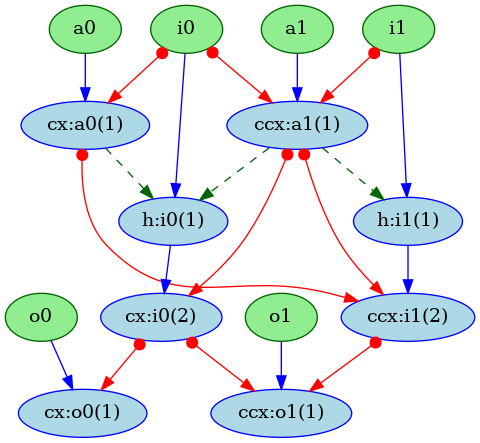

In [6]:
from helperfunctions.graphhelper import breakdown_qubit, edge_attr, node_attr
from rustworkx.visualization import graphviz_draw

qubits =  [breakdown_qubit(q)['label'] for q in circ.qubits]

ancillas_list = qubits[-num_a:]
output_list = qubits[num_i:num_i+num_o]
print(ancillas_list)
print(output_list)

cg = get_computation_graph(circ, ancillas_list, outputs=output_list)

print(cg.nodes())

graphviz_draw(cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)


[CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
, CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
, CGNode: Labeled o0 @ index: 2 of type output is a initialize node.
, CGNode: Labeled o1 @ index: 3 of type output is a initialize node.
, CGNode: Labeled a0 @ index: 4 of type ancilla is a initialize node.
, CGNode: Labeled a1 @ index: 5 of type ancilla is a initialize node.
, CGNode: Labeled a0 @ index: 6 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 7 of type ancilla is a computation node.
, CGNode: Labeled i0 @ index: 8 of type input is a computation node.
, CGNode: Labeled i1 @ index: 9 of type input is a computation node.
, CGNode: Labeled i1 @ index: 10 of type input is a computation node.
, CGNode: Labeled i0 @ index: 11 of type input is a computation node.
, CGNode: Labeled o0 @ index: 12 of type output is a computation node.
, CGNode: Labeled o1 @ index: 13 of type output is a computation node.
, CGNode: Labeled i0 @ in

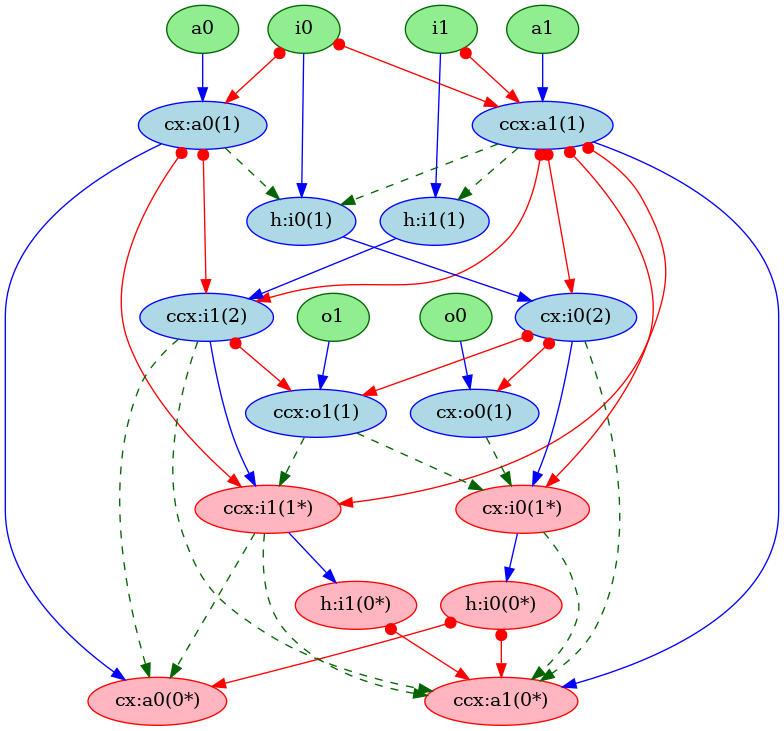

In [7]:
all_uncomp_cg = reverse_all_operations(cg)
print(all_uncomp_cg.nodes())
graphviz_draw(all_uncomp_cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)

Building uncomp circuit from circuit graph: 100%|██████████| 20/20 [00:00<00:00, 85598.04it/s]

14


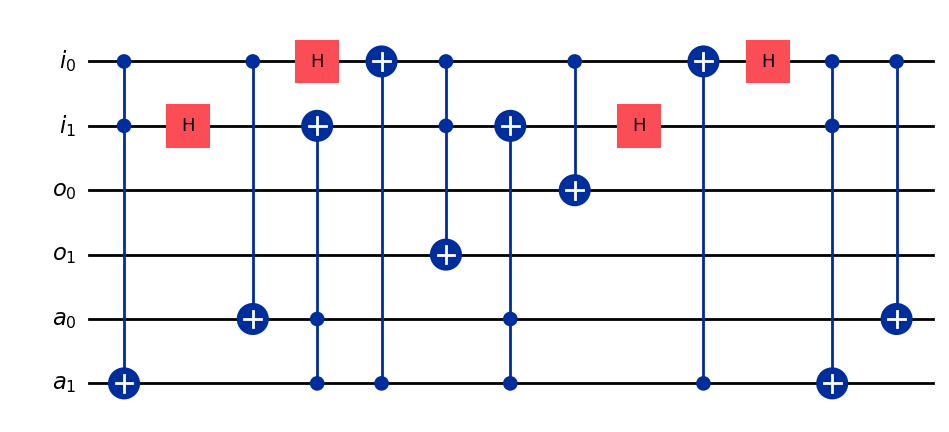

In [8]:
uncomp_circ = get_uncomp_circuit(all_uncomp_cg)
print(sum(uncomp_circ.count_ops().values()))
uncomp_circ.draw('mpl')

True
[CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
, CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
, CGNode: Labeled o0 @ index: 2 of type output is a initialize node.
, CGNode: Labeled o1 @ index: 3 of type output is a initialize node.
, CGNode: Labeled a0 @ index: 4 of type ancilla is a initialize node.
, CGNode: Labeled a1 @ index: 5 of type ancilla is a initialize node.
, CGNode: Labeled a0 @ index: 6 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 7 of type ancilla is a computation node.
, CGNode: Labeled i0 @ index: 8 of type input is a computation node.
, CGNode: Labeled i1 @ index: 9 of type input is a computation node.
, CGNode: Labeled i1 @ index: 10 of type input is a computation node.
, CGNode: Labeled i0 @ index: 11 of type input is a computation node.
, CGNode: Labeled o0 @ index: 12 of type output is a computation node.
, CGNode: Labeled o1 @ index: 13 of type output is a computation node.
, CGNode: Labeled a0

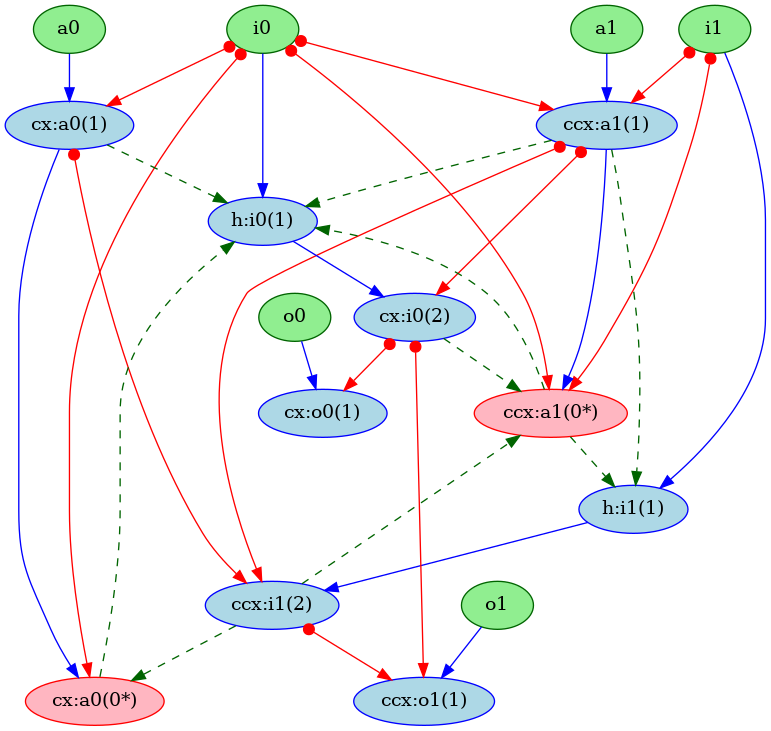

In [9]:
from helperfunctions.uncompfunctions import add_uncomputation


pldi_uncomp_cg, has_cycles = add_uncomputation(cg, ancillas_list)
print(has_cycles)
print(pldi_uncomp_cg.nodes())
graphviz_draw(pldi_uncomp_cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)


In [10]:
if not has_cycles:
    pldi_uncomp_circ = get_uncomp_circuit(pldi_uncomp_cg)
    print(sum(pldi_uncomp_circ.count_ops().values()))
    pldi_uncomp_circ.draw('mpl')

Checking Out Exhaustive Uncomp for All Ancillas: 4it [00:00, 2535.09it/s]


[CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
, CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
, CGNode: Labeled o0 @ index: 2 of type output is a initialize node.
, CGNode: Labeled o1 @ index: 3 of type output is a initialize node.
, CGNode: Labeled a0 @ index: 4 of type ancilla is a initialize node.
, CGNode: Labeled a1 @ index: 5 of type ancilla is a initialize node.
, CGNode: Labeled a0 @ index: 6 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 7 of type ancilla is a computation node.
, CGNode: Labeled i0 @ index: 8 of type input is a computation node.
, CGNode: Labeled i1 @ index: 9 of type input is a computation node.
, CGNode: Labeled i1 @ index: 10 of type input is a computation node.
, CGNode: Labeled i0 @ index: 11 of type input is a computation node.
, CGNode: Labeled o0 @ index: 12 of type output is a computation node.
, CGNode: Labeled o1 @ index: 13 of type output is a computation node.
, CGNode: Labeled a0 @ in

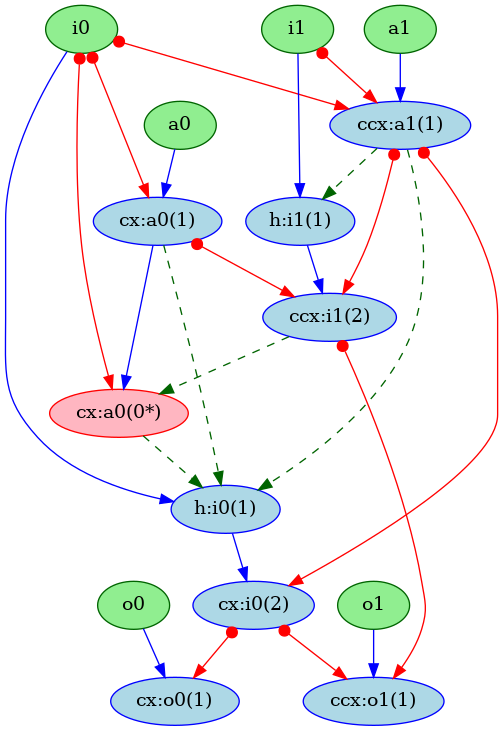

In [11]:
from helperfunctions.uncompfunctions import exhaustive_uncomputation


exhaustive_uncomp_cg = exhaustive_uncomputation(cg, ancillas_list)
# print(has_cycles)
print(exhaustive_uncomp_cg.nodes())
graphviz_draw(exhaustive_uncomp_cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)


Building uncomp circuit from circuit graph: 100%|██████████| 15/15 [00:00<00:00, 5654.73it/s]

9


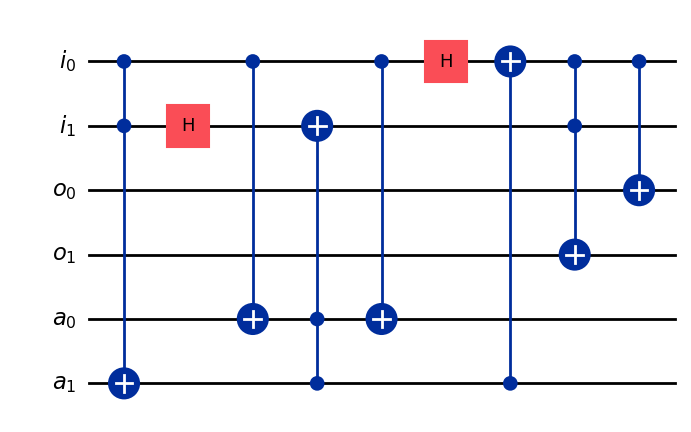

In [12]:
exhaustive_uncomp_circ = get_uncomp_circuit(exhaustive_uncomp_cg)
print(sum(exhaustive_uncomp_circ.count_ops().values()))
exhaustive_uncomp_circ.draw('mpl')

Iterating over all cycles:   0%|          | 3/100000 [00:00<00:03, 25471.48it/s]


a1 3
[CGNode: Labeled i0 @ index: 0 of type input is a initialize node.
, CGNode: Labeled i1 @ index: 1 of type input is a initialize node.
, CGNode: Labeled o0 @ index: 2 of type output is a initialize node.
, CGNode: Labeled o1 @ index: 3 of type output is a initialize node.
, CGNode: Labeled a0 @ index: 4 of type ancilla is a initialize node.
, CGNode: Labeled a1 @ index: 5 of type ancilla is a initialize node.
, CGNode: Labeled a0 @ index: 6 of type ancilla is a computation node.
, CGNode: Labeled a1 @ index: 7 of type ancilla is a computation node.
, CGNode: Labeled i0 @ index: 8 of type input is a computation node.
, CGNode: Labeled i1 @ index: 9 of type input is a computation node.
, CGNode: Labeled i1 @ index: 10 of type input is a computation node.
, CGNode: Labeled i0 @ index: 11 of type input is a computation node.
, CGNode: Labeled o0 @ index: 12 of type output is a computation node.
, CGNode: Labeled o1 @ index: 13 of type output is a computation node.
, CGNode: Labeled a0

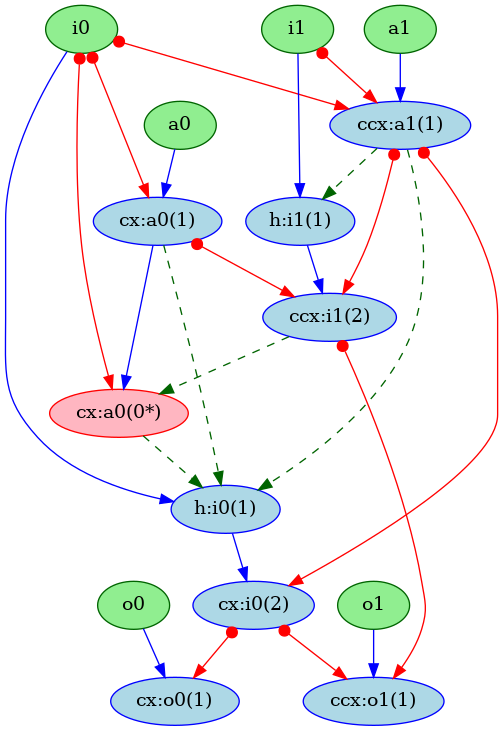

In [13]:
from helperfunctions.uncompfunctions import greedy_uncomputation_partial


greedy_partial_uncomp_cg = greedy_uncomputation_partial(cg, ancillas_list)
# print(has_cycles)
print(greedy_partial_uncomp_cg.nodes())
graphviz_draw(greedy_partial_uncomp_cg,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr)

Building uncomp circuit from circuit graph: 100%|██████████| 15/15 [00:00<00:00, 76725.07it/s]


9


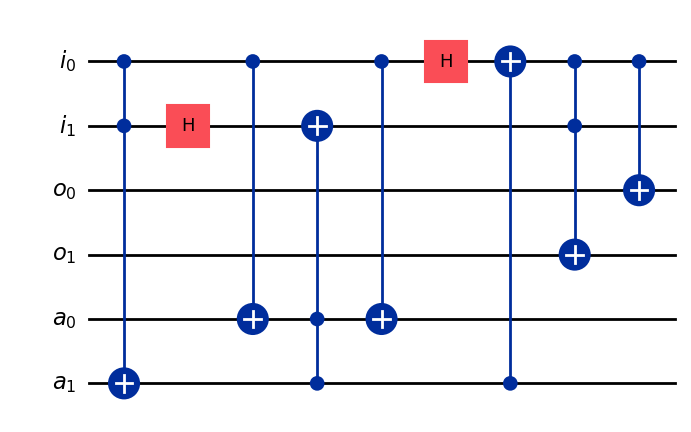

In [14]:
greedy_partial_uncomp_circ = get_uncomp_circuit(greedy_partial_uncomp_cg)
print(sum(greedy_partial_uncomp_circ.count_ops().values()))
greedy_partial_uncomp_circ.draw('mpl')